# Retail Giant Sales Forecasting Assignment

## Problem Statement:
- Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate and home office.

 

- As a sales manager for this store, you have to forecast the sales of the products for the next 6 months, so that you have a proper estimate and can plan your inventory and business processes accordingly.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")                    

## Data Review

In [4]:
df=pd.read_csv("D:\My Personal Docs\Education Program\TimeSeries\Assignment\Global+Superstore+Data.csv")
df.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [5]:
df.shape

(51290, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


- All the values are fully populated , so no data clean up required

# Data Preparation

In [7]:
# Adding New column for Market and Segment , to get 21 combinations of data
df['Market_Segment']=df.Market+'-'+df.Segment
# Adding Month Year
df['OrderMonthYear']=pd.to_datetime(df['Order Date'],format='%d-%m-%Y').dt.to_period('m')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   Order Date      51290 non-null  object   
 1   Segment         51290 non-null  object   
 2   Market          51290 non-null  object   
 3   Sales           51290 non-null  float64  
 4   Profit          51290 non-null  float64  
 5   Market_Segment  51290 non-null  object   
 6   OrderMonthYear  51290 non-null  period[M]
dtypes: float64(2), object(4), period[M](1)
memory usage: 2.7+ MB


In [9]:
# converting period data type to datetime
df['OrderMonthYear']=df['OrderMonthYear'].values.astype('datetime64[M]') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      51290 non-null  object        
 1   Segment         51290 non-null  object        
 2   Market          51290 non-null  object        
 3   Sales           51290 non-null  float64       
 4   Profit          51290 non-null  float64       
 5   Market_Segment  51290 non-null  object        
 6   OrderMonthYear  51290 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 2.7+ MB


In [10]:
# pivot table to get each line for market segment 
df=df.pivot_table(index='OrderMonthYear',columns=['Market_Segment'],values="Sales",aggfunc='sum')
df.head()

Market_Segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
OrderMonthYear,,,,,,,,,,,,,,,,,,,,,
2011-01-01,15711.7125,3374.2098,3973.6623,7909.083,1760.046,2071.770,314.22,16.29,NaN,2790.456,...,299.490,7690.4010,5796.7515,5116.560,15634.34976,5336.44400,862.23200,6637.151,1701.528,5607.550
2011-02-01,12910.8588,18157.2654,5869.0272,4886.136,1087.899,2942.562,56.91,NaN,440.52,1287.510,...,1271.310,7553.2620,13917.1065,1165.539,5107.11752,4535.13420,1036.07936,3458.520,1183.668,168.370
2011-03-01,19472.5632,8769.7386,4817.5392,2656.830,1073.934,163.680,1405.26,NaN,174.96,9696.108,...,1235.982,12001.3710,5878.8090,3298.173,13054.89924,2241.99512,1247.58400,11869.304,11106.799,32714.906
2011-04-01,15440.3046,8985.6765,5739.2580,4004.082,3767.901,2710.446,286.08,NaN,NaN,1769.001,...,1364.640,11991.1905,10905.7785,3983.838,10375.44148,2801.01600,4072.28560,9108.612,14131.729,5055.004
2011-05-01,24348.9723,20841.3672,1909.3983,5011.614,1210.308,487.476,752.01,NaN,NaN,3716.592,...,2338.068,15412.3005,13112.0340,2603.322,16335.98724,6934.99556,5167.78400,12819.163,9142.000,1687.124


## Splitting Train and Test data

In [11]:
# Getting 42 months of data as train and 6 months as test
train_len=42
train_sales=df[:train_len]
test_sales=df[train_len:]
train_sales.shape , test_sales.shape

((42, 21), (6, 21))

### Calculating Coefficient of variation  (COV) - Ratio of Standard Deviation to Mean for each Market Segment 
- Lower the COV , lesser the variation in data and we can consider that market segment as most profitable

In [12]:
cov={}
for i in  train_sales.columns:
    cov[i]=round(train_sales[i].std()/train_sales[i].mean(),2)

sorted(cov.items(), key=lambda x: x[1])

[('APAC-Consumer', 0.42),
 ('EU-Consumer', 0.46),
 ('APAC-Corporate', 0.48),
 ('LATAM-Consumer', 0.48),
 ('EU-Corporate', 0.51),
 ('APAC-Home Office', 0.54),
 ('Africa-Consumer', 0.56),
 ('EMEA-Corporate', 0.56),
 ('EU-Home Office', 0.59),
 ('US-Consumer', 0.59),
 ('LATAM-Home Office', 0.6),
 ('US-Corporate', 0.6),
 ('EMEA-Consumer', 0.62),
 ('LATAM-Corporate', 0.62),
 ('Africa-Corporate', 0.73),
 ('Africa-Home Office', 0.74),
 ('US-Home Office', 0.78),
 ('EMEA-Home Office', 0.84),
 ('Canada-Corporate', 0.94),
 ('Canada-Consumer', 1.14),
 ('Canada-Home Office', 1.65)]

*  Looking at COV of each Market Segment , APAC - Consumer is having lowest COV .So this is most profitable segment and less variation in data


In [13]:
# Preparing new train & test for most profitable market segment
train=train_sales[['APAC-Consumer']]
test=test_sales[['APAC-Consumer']]
test.shape , train.shape

((6, 1), (42, 1))

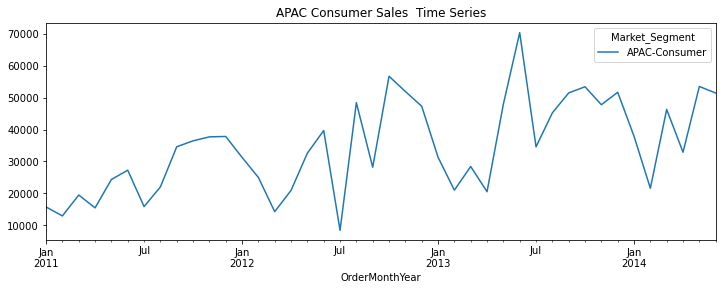

In [14]:
# Plotting time series
train.plot(figsize=[12,4])
plt.title("APAC Consumer Sales  Time Series")
plt.show()

# Building Models 


In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
# Function to Calculate RMSE and MAPE errors
def cal_error(method,test,forecast):
    rmse=np.sqrt(mean_squared_error(test,forecast)).round(2)
    mape=np.round(np.mean(np.abs(test-forecast)/test)*100,2)
    results=pd.DataFrame({'Method':[method], 'RMSE': [rmse],'MAPE': [mape] })
    results=results[['Method', 'RMSE', 'MAPE']]
    return(results)


In [17]:
# Function to plot Train  , Test , Forecast for timeseries
def forecast_plot(method,train,test,forecast):
    plt.figure(figsize=(12,4))
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    plt.plot(forecast, label=method)
    plt.legend(loc='best')
    plt.title(method)
    return(plt.show())

### Naive Method

In [18]:
# Getting Last Value from the train set for Naive Method
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['APAC-Consumer'][train_len-1]
y_hat_naive

Market_Segment,APAC-Consumer,naive_forecast
OrderMonthYear,,
2014-07-01,36524.3028,51483.7011
2014-08-01,63521.7729,51483.7011
2014-09-01,44477.2662,51483.7011
2014-10-01,77379.8286,51483.7011
2014-11-01,82286.3583,51483.7011
2014-12-01,60292.1310,51483.7011


### Plot train, test and forecast

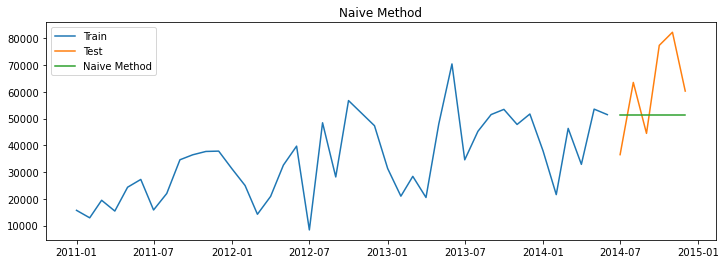

In [19]:
forecast_plot('Naive Method',train['APAC-Consumer'],test['APAC-Consumer'],y_hat_naive['naive_forecast'])

In [20]:
results=pd.DataFrame()
tempResults=cal_error('Naive Method',test['APAC-Consumer'],y_hat_naive['naive_forecast'])
results=pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86


### Simple Average Method

In [21]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['APAC-Consumer'].mean()

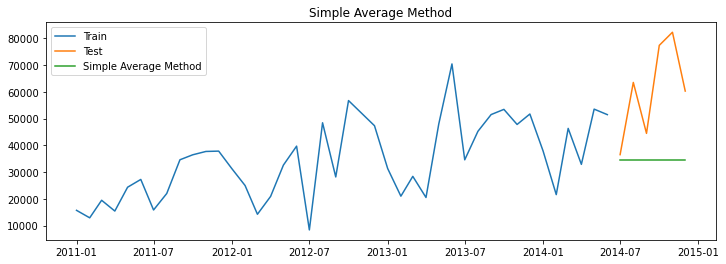

In [22]:
# Plot Train, Test & Forecast
forecast_plot('Simple Average Method',train['APAC-Consumer'],test['APAC-Consumer'],y_hat_avg['avg_forecast'])

In [23]:
# Calculate RMSE & MAPE Error
tempResults=cal_error('Simple Average Method',test['APAC-Consumer'],y_hat_avg['avg_forecast'])
results= pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18


### Simple Moving Average

In [24]:
y_hat_sma = df['APAC-Consumer'].copy()
ma_window = 12
y_hat_sma['sma_forecast'] = df['APAC-Consumer'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

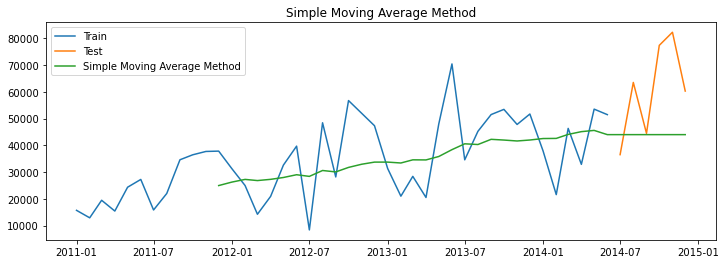

In [25]:
# Plot Train, Test & Forecast
forecast_plot('Simple Moving Average Method',train['APAC-Consumer'],test['APAC-Consumer'], y_hat_sma['sma_forecast'])

In [26]:
# Calculate RMSE & MAPE Error
tempResults=cal_error('Simple Moving Average Method',test['APAC-Consumer'],y_hat_sma['sma_forecast'][train_len:])
results= pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,23383.65,28.15


## Simple exponential smoothing

In [27]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['APAC-Consumer'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

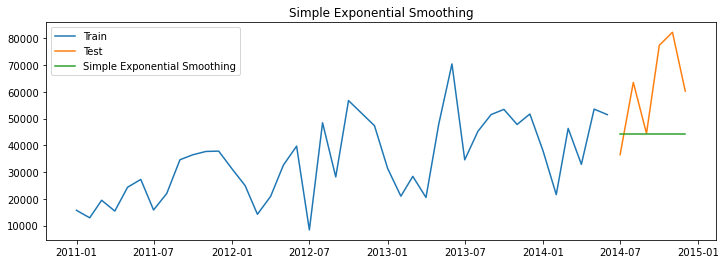

In [28]:
# Plot Train, Test & Forecast
forecast_plot('Simple Exponential Smoothing',train['APAC-Consumer'],test['APAC-Consumer'], y_hat_ses['ses_forecast'])

In [29]:
# Calculate RMSE & MAPE Error
tempResults=cal_error('Simple Exponential Smoothing Method',test['APAC-Consumer'],y_hat_ses['ses_forecast'])
results= pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,23383.65,28.15
0,Simple Exponential Smoothing Method,23112.44,27.82


### Holt Winters Method with Trends

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['APAC-Consumer']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 15711.712500000003, 'initial_slope': -2800.8537000000033, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


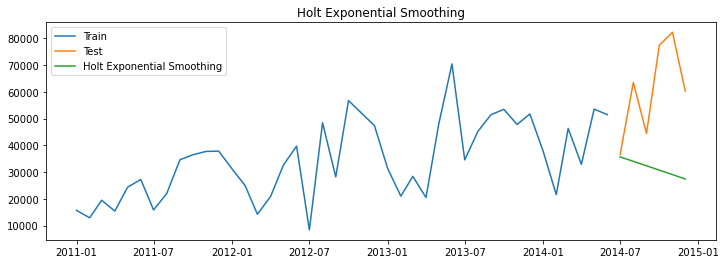

In [31]:
# Plot Train, Test & Forecast
forecast_plot('Holt Exponential Smoothing',train['APAC-Consumer'],test['APAC-Consumer'], y_hat_holt['holt_forecast'])

In [32]:
# Calculate RMSE & MAPE Error
tempResults=cal_error('Holt Exponential Smoothing Method',test['APAC-Consumer'],y_hat_holt['holt_forecast'])
results= pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,23383.65,28.15
0,Simple Exponential Smoothing Method,23112.44,27.82
0,Holt Exponential Smoothing Method,34412.52,42.57


### Holt Winters Method - Additive`

In [33]:
# Fitting Model
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['APAC-Consumer']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.052631578947367676, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.10526315789474942, 'damping_slope': nan, 'initial_level': 29061.291899999596, 'initial_slope': 730.4167145833245, 'initial_seasons': array([-13349.5794, -16150.4331,  -9588.7287, -13620.9873,  -4712.3196,
        -1801.2723, -13218.4602,  -7049.0553,   5551.893 ,   7410.7551,
         8661.312 ,   8785.6992]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


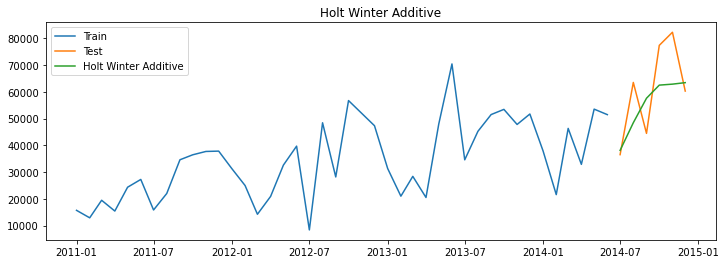

In [34]:
# Plot Train, Test & Forecast
forecast_plot('Holt Winter Additive',train['APAC-Consumer'],test['APAC-Consumer'], y_hat_hwa['hw_forecast'])

In [35]:
# Calculate RMSE & MAPE Error
tempResults=cal_error('Holt Winter Additive Method',test['APAC-Consumer'],y_hat_hwa['hw_forecast'])
results= pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,23383.65,28.15
0,Simple Exponential Smoothing Method,23112.44,27.82
0,Holt Exponential Smoothing Method,34412.52,42.57
0,Holt Winter Additive Method,12971.01,17.61


### Holt Winters Multiplicative Method with trend and seasonality

In [36]:
y_hat_hwm = test_sales.copy()
model = ExponentialSmoothing(np.asarray(train['APAC-Consumer']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.05263157894736842, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.21052631578947367, 'damping_slope': nan, 'initial_level': 29061.291900000004, 'initial_slope': 730.4167145833347, 'initial_seasons': array([0.54064054, 0.44426307, 0.67005153, 0.53130138, 0.83784893,
       0.93801816, 0.54515235, 0.75744178, 1.19104082, 1.25500432,
       1.29803603, 1.3023162 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


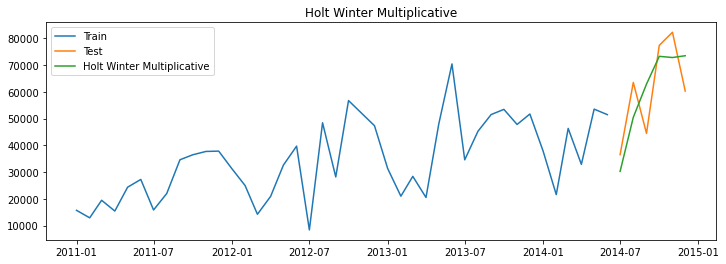

In [37]:
# Plot Train, Test & Forecast
forecast_plot('Holt Winter Multiplicative',train['APAC-Consumer'],test['APAC-Consumer'], y_hat_hwm['hw_forecast'])

In [38]:
# Calculate RMSE & MAPE Error
tempResults=cal_error('Holt Winter Multiplicative Method',test['APAC-Consumer'],y_hat_hwm['hw_forecast'])
results= pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,23383.65,28.15
0,Simple Exponential Smoothing Method,23112.44,27.82
0,Holt Exponential Smoothing Method,34412.52,42.57
0,Holt Winter Additive Method,12971.01,17.61
0,Holt Winter Multiplicative Method,11753.42,19.62


## Auto Regressive Methods

### Checking Stationarity vs non-stationary in time series

### Augmented Dickey-Fuller (ADF) test
- Null Hypothesis (H0): The series is not stationary
 -  p−value>0.05
- Alternate Hypothesis (H1): The series is stationary
    - p−value≤0.05


In [39]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(train['APAC-Consumer'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.967177
Critical Values @ 0.05: -2.94
p-value: 0.001592


- p-value is greater than .05 ,  so series is stationary

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
- Null Hypothesis (H0): The series is stationary
   - p−value>0.05
- Alternate Hypothesis (H1): The series is not stationary
  -  p−value≤0.05

In [40]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(train['APAC-Consumer'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.502104
Critical Values @ 0.05: 0.46
p-value: 0.041193


- p-value is < .05,so we can say series is not stationary

### Box Cox Transformations to make variance constant

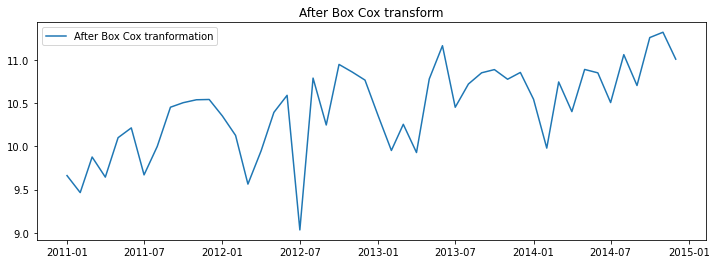

In [41]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(df['APAC-Consumer'], lmbda=0), index = df.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to make the series stationary as KPSS says its not stationary

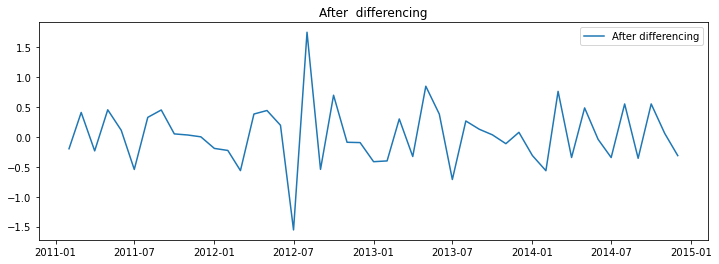

In [42]:
data_diff = pd.Series(data_boxcox - data_boxcox.shift(), df.index)
plt.figure(figsize=(12,4))
plt.plot(data_diff, label='After differencing')
plt.legend(loc='best')
plt.title('After  differencing')
plt.show()

In [43]:
data_diff.head()

OrderMonthYear
2011-01-01         NaN
2011-02-01   -0.196338
2011-03-01    0.410938
2011-04-01   -0.232025
2011-05-01    0.455508
dtype: float64

In [44]:
data_diff.dropna(inplace=True)

In [45]:
# Running ADF Test again
adf_test = adfuller(data_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -5.769275
Critical Values @ 0.05: -2.95
p-value: 0.000001


In [46]:
kpss_test = kpss(data_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.135659
Critical Values @ 0.05: 0.46
p-value: 0.100000


- Data is stationary

## Split data after box cox & differencing

In [47]:
# Split train & test data after box cox transformation & differencing
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_diff[:train_len-1]
test_data_boxcox_diff = data_diff[train_len-1:]

### Auto regression method (AR)

In [48]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.031320
ar.L1.y   -0.483978
dtype: float64


### Recover Original Series

In [49]:
y_hat_ar = data_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_diff.index.min(), data_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

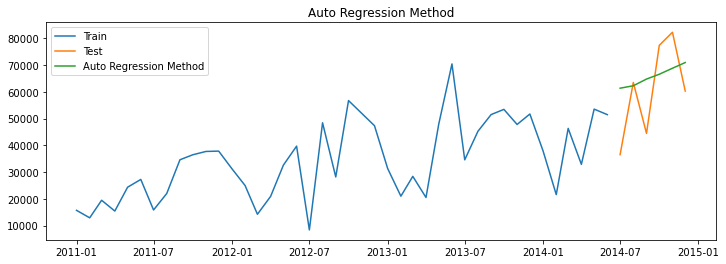

In [50]:
# Plot Train, Test & Forecast
forecast_plot('Auto Regression Method',train['APAC-Consumer'],test['APAC-Consumer'], y_hat_ar['ar_forecast'][train_len-1:])

In [51]:
# Calculate RMSE & MAPE Error
tempResults=cal_error('Auto Regression Method',test['APAC-Consumer'],y_hat_ar['ar_forecast'][train_len-1:])
results= pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,23383.65,28.15
0,Simple Exponential Smoothing Method,23112.44,27.82
0,Holt Exponential Smoothing Method,34412.52,42.57
0,Holt Winter Additive Method,12971.01,17.61
0,Holt Winter Multiplicative Method,11753.42,19.62
0,Auto Regression Method,15505.02,27.27


### Moving average method (MA)

In [52]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)


const      0.022694
ma.L1.y   -1.000000
dtype: float64


In [53]:
### Recover original time series
y_hat_ma = data_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_diff.index.min(), data_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

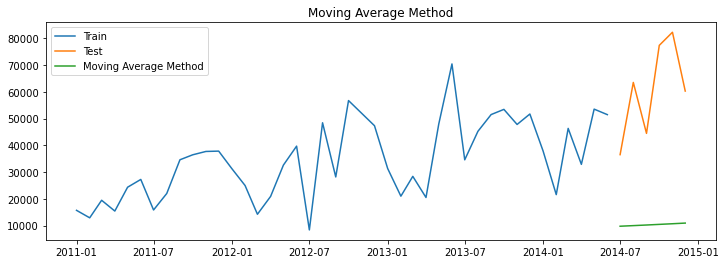

In [54]:
# Plot Train, Test & Forecast
forecast_plot('Moving Average Method',train['APAC-Consumer'],test['APAC-Consumer'], y_hat_ma['ma_forecast'][train_len-1:])

In [55]:
# Calculate RMSE & MAPE Error
tempResults=cal_error('Moving Average Method',test['APAC-Consumer'],y_hat_ma['ma_forecast'][train_len-1:])
results= pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,23383.65,28.15
0,Simple Exponential Smoothing Method,23112.44,27.82
0,Holt Exponential Smoothing Method,34412.52,42.57
0,Holt Winter Additive Method,12971.01,17.61
0,Holt Winter Multiplicative Method,11753.42,19.62
0,Auto Regression Method,15505.02,27.27
0,Moving Average Method,52903.35,81.64


### Auto regression moving average method (ARMA)

In [56]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.022810
ar.L1.y    0.115922
ma.L1.y   -0.999957
dtype: float64


In [57]:
# Recover Original Series
y_hat_arma = data_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_diff.index.min(), data_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

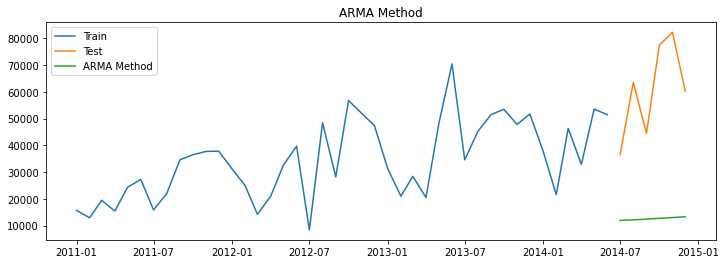

In [58]:
# Plot Train, Test & Forecast
forecast_plot('ARMA Method',train['APAC-Consumer'],test['APAC-Consumer'], y_hat_arma['arma_forecast'][train_len-1:])

In [59]:
# Calculate RMSE & MAPE Error
tempResults=cal_error('ARMA',test['APAC-Consumer'],y_hat_arma['arma_forecast'][train_len-1:])
results= pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,23383.65,28.15
0,Simple Exponential Smoothing Method,23112.44,27.82
0,Holt Exponential Smoothing Method,34412.52,42.57
0,Holt Winter Additive Method,12971.01,17.61
0,Holt Winter Multiplicative Method,11753.42,19.62
0,Auto Regression Method,15505.02,27.27
0,Moving Average Method,52903.35,81.64
0,ARMA,50757.92,77.66


# ARIMA Method

In [60]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.022810
ar.L1.D.y    0.115922
ma.L1.D.y   -0.999957
dtype: float64


In [61]:
#Recover Original Series
y_hat_arima = data_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_diff.index.min(), data_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

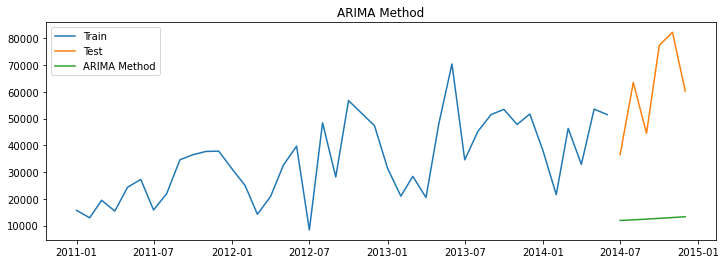

In [62]:
# Plot Train, Test & Forecast
forecast_plot('ARIMA Method',train['APAC-Consumer'],test['APAC-Consumer'], y_hat_arima['arima_forecast'][train_len-1:])

In [63]:
# Calculate RMSE & MAPE Error
tempResults=cal_error('ARIMA Method',test['APAC-Consumer'],y_hat_arima['arima_forecast'][train_len-1:])
results= pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,23383.65,28.15
0,Simple Exponential Smoothing Method,23112.44,27.82
0,Holt Exponential Smoothing Method,34412.52,42.57
0,Holt Winter Additive Method,12971.01,17.61
0,Holt Winter Multiplicative Method,11753.42,19.62
0,Auto Regression Method,15505.02,27.27
0,Moving Average Method,52903.35,81.64
0,ARMA,50757.92,77.66


# SARIMA Method

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.100536
ma.L1      -0.994255
ar.S.L12   -0.395027
ma.S.L12   -0.985929
sigma2      0.047403
dtype: float64


In [65]:
# Recover Series
y_hat_sarima = data_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_diff.index.min(), data_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

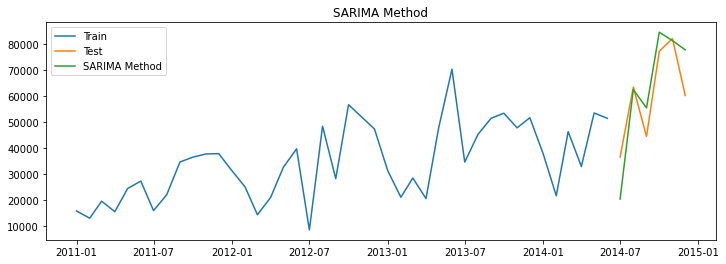

In [66]:
# Plot Train, Test & Forecast
forecast_plot('SARIMA Method',train['APAC-Consumer'],test['APAC-Consumer'], y_hat_sarima['sarima_forecast'][train_len-1:])

In [67]:
# Calculate RMSE & MAPE Error
tempResults=cal_error('SARIMA Method',test['APAC-Consumer'],y_hat_sarima['sarima_forecast'][train_len-1:])
results= pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,23383.65,28.15
0,Simple Exponential Smoothing Method,23112.44,27.82
0,Holt Exponential Smoothing Method,34412.52,42.57
0,Holt Winter Additive Method,12971.01,17.61
0,Holt Winter Multiplicative Method,11753.42,19.62
0,Auto Regression Method,15505.02,27.27
0,Moving Average Method,52903.35,81.64
0,ARMA,50757.92,77.66


### Inference : Based on all methods applied , HOLT Winter's Additive Method is best , next best is SARIMA Methods